In [1]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO

In [2]:
logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)

In [3]:
chunk_size=4096
file_name="Miniconda3-latest-Linux-x86_64.sh"
url_base="https://repo.continuum.io/miniconda/"
conda_path=os.path.expanduser(os.path.join("~", "miniconda"))
rdkit_version=None
add_python_path=True
force=False

In [4]:
!curl -Lo rdkit_installer.py https://git.io/fxiPZ
import rdkit_installer

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2415  100  2415    0     0   5861      0 --:--:-- --:--:-- --:--:--  5861


In [5]:
import rdkit_installer
rdkit_installer.install()

add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.09.1 installation finished!


In [6]:
python_path = os.path.join(
    conda_path,
    "lib",
    "python{0}.{1}".format(*sys.version_info),
    "site-packages",
    )

In [7]:
if add_python_path and python_path not in sys.path:
  logger.info("add {} to PYTHONPATH".format(python_path))
  sys.path.append(python_path)

In [8]:
if os.path.isdir(os.path.join(python_path, "rdkit")):
  logger.info("rdkit is already installed")
  if not force:
    print(1)

rdkit is already installed


1


In [9]:
url = url_base + file_name
python_version = "{0}.{1}.{2}".format(*sys.version_info)

logger.info("python version: {}".format(python_version))

if os.path.isdir(conda_path):
  logger.warning("remove current miniconda")
  shutil.rmtree(conda_path)
elif os.path.isfile(conda_path):
  logger.warning("remove {}".format(conda_path))
  os.remove(conda_path)

python version: 3.6.9
remove current miniconda


In [10]:
logger.info('fetching installer from {}'.format(url))
res = requests.get(url, stream=True)
res.raise_for_status()

with open(file_name, 'wb') as f:
  for chunk in res.iter_content(chunk_size):
    f.write(chunk)
logger.info('done')

fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done


In [11]:
logger.info('installing miniconda to {}'.format(conda_path))
subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
logger.info('done')

installing miniconda to /root/miniconda
done


In [12]:
logger.info("installing rdkit")
subprocess.check_call([
                       os.path.join(conda_path, "bin", "conda"),
                       "install",
                       "--yes",
                       "-c",
                       "rdkit",
                       "python=={}".format(python_version),
                       "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)
                       ])
logger.info("done")

import rdkit
logger.info("rdkit-{} installation finished!".format(rdkit.__version__))

installing rdkit
done
rdkit-2020.09.1 installation finished!


In [13]:
from rdkit import Chem

print(Chem.__doc__)

 A module for molecules and stuff

 see Chem/index.html in the doc tree for documentation




In [14]:
!git clone https://github.com/tna325/dataset

Cloning into 'dataset'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [15]:
!cd dataset
!ls

dataset				   __pycache__	       sample_data
Miniconda3-latest-Linux-x86_64.sh  rdkit_installer.py


In [16]:
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, DataStructs
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem import PandasTools as pdt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

,chembl_id,chembl_pref_name,ID,ROMol
0,CHEMBL364512,RISPERIDON,,
1,CHEMBL583,GREPAFLOXACIN,,
2,CHEMBL196431,None,,
3,CHEMBL1514,LEVOMETHADYL ACETATE,,
4,CHEMBL485,CODEINE,,

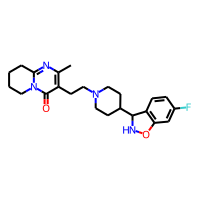
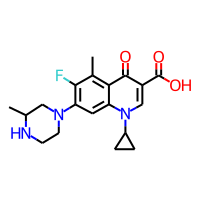
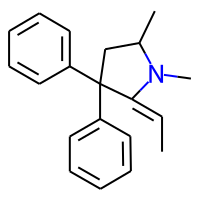
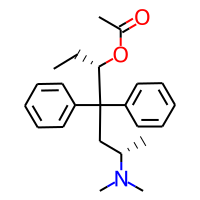
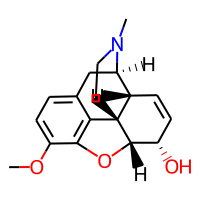

In [17]:
df = pdt.LoadSDF('dataset/herginhib.sdf')
df.head()

In [ ]:
df["Fsp3"] = df["ROMol"].map(Descriptors.FractionCSP3)
df['FP'] = df.apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x['ROMol'], 2, 2048), axis=1)

In [ ]:
df.head

<bound method NDFrame.head of        chembl_id  ...                                                 FP
0   CHEMBL364512  ...  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1      CHEMBL583  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2   CHEMBL196431  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     CHEMBL1514  ...  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4      CHEMBL485  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
..           ...  ...                                                ...
68   CHEMBL92870  ...  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
69    CHEMBL1106  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
70  CHEMBL327980  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
71      CHEMBL72  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
72      CHEMBL46  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[73 rows x 6 columns]>

In [ ]:
df.columns

Index(['chembl_id', 'chembl_pref_name', 'ID', 'ROMol', 'Fsp3', 'FP'], dtype='object')

In [ ]:
df_FP = df["FP"]
print(df_FP)

0     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                            ...                        
68    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
69    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
70    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
71    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
72    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: FP, Length: 73, dtype: object


In [ ]:
# methodのリスト
method_list = ("average", "centroid", "complete", "median", "single", "ward", "weighted")
data = []   # dataを格納するリスト
label = []  # labelを格納するリスト
dis_matrix = []

In [ ]:
#フィンガープリントを再計算し、リスト作成
l_2d = df['ROMol'].values.tolist()
morgan_fp = [AllChem.GetMorganFingerprintAsBitVect(x,2,2048) for x in l_2d]
#類似度を計算し、距離行列？類似度の行列？を作成
dis_matrix = [DataStructs.BulkTanimotoSimilarity(morgan_fp[i], morgan_fp[:len(l_2d)],returnDistance=True) for i in range(len(l_2d))]
dis_array = np.array(dis_matrix)
print(dis_array)

[[0.         0.82653061 0.9047619  ... 0.75824176 0.8902439  0.84042553]
 [0.82653061 0.         0.89333333 ... 0.85714286 0.90666667 0.86363636]
 [0.9047619  0.89333333 0.         ... 0.875      0.82       0.85074627]
 ...
 [0.75824176 0.85714286 0.875      ... 0.         0.85714286 0.83333333]
 [0.8902439  0.90666667 0.82       ... 0.85714286 0.         0.8125    ]
 [0.84042553 0.86363636 0.85074627 ... 0.83333333 0.8125     0.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


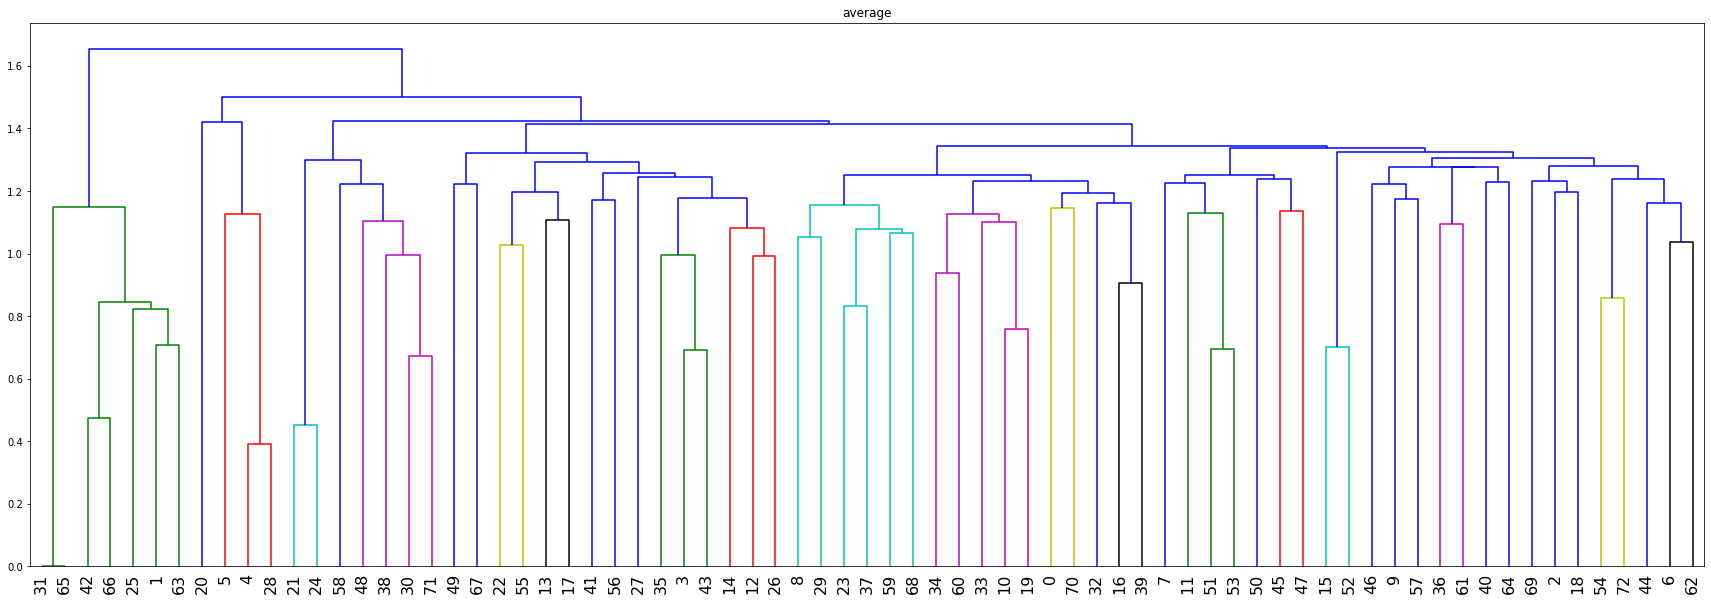

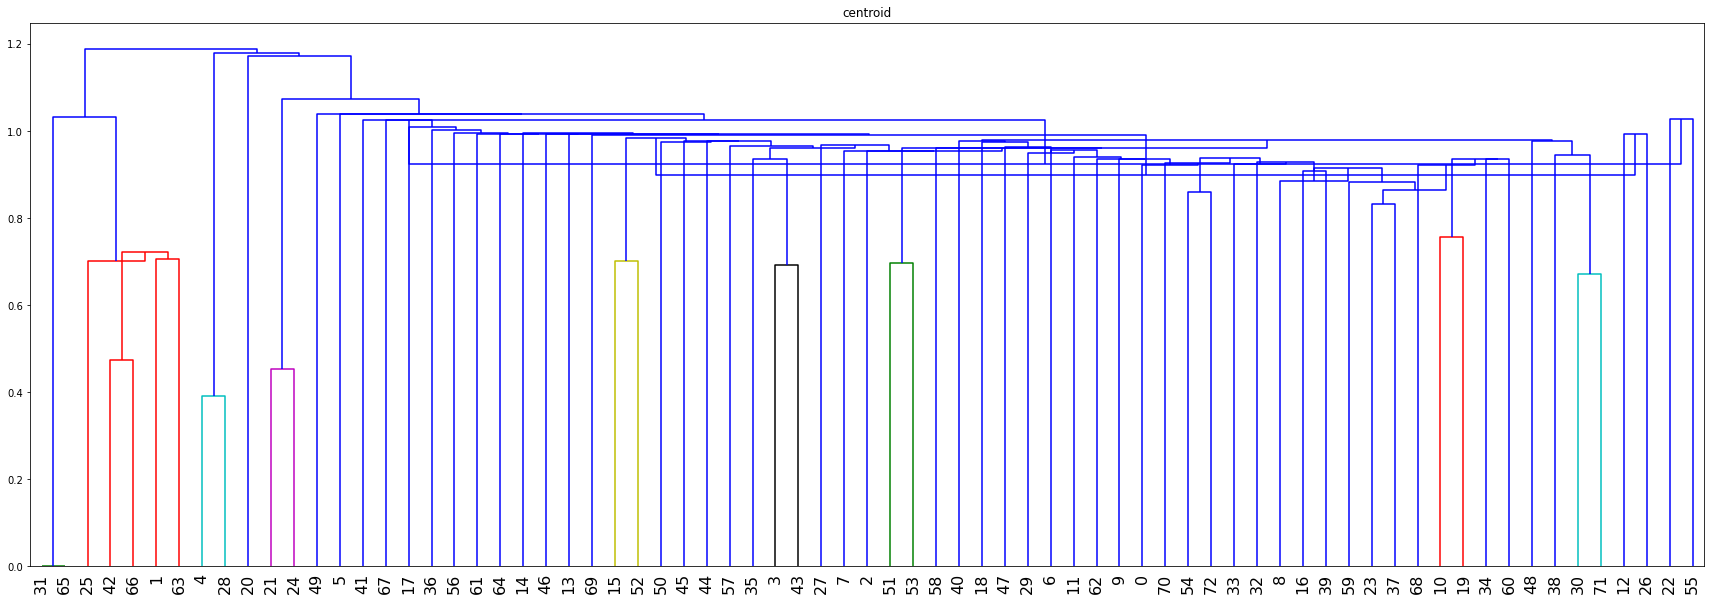

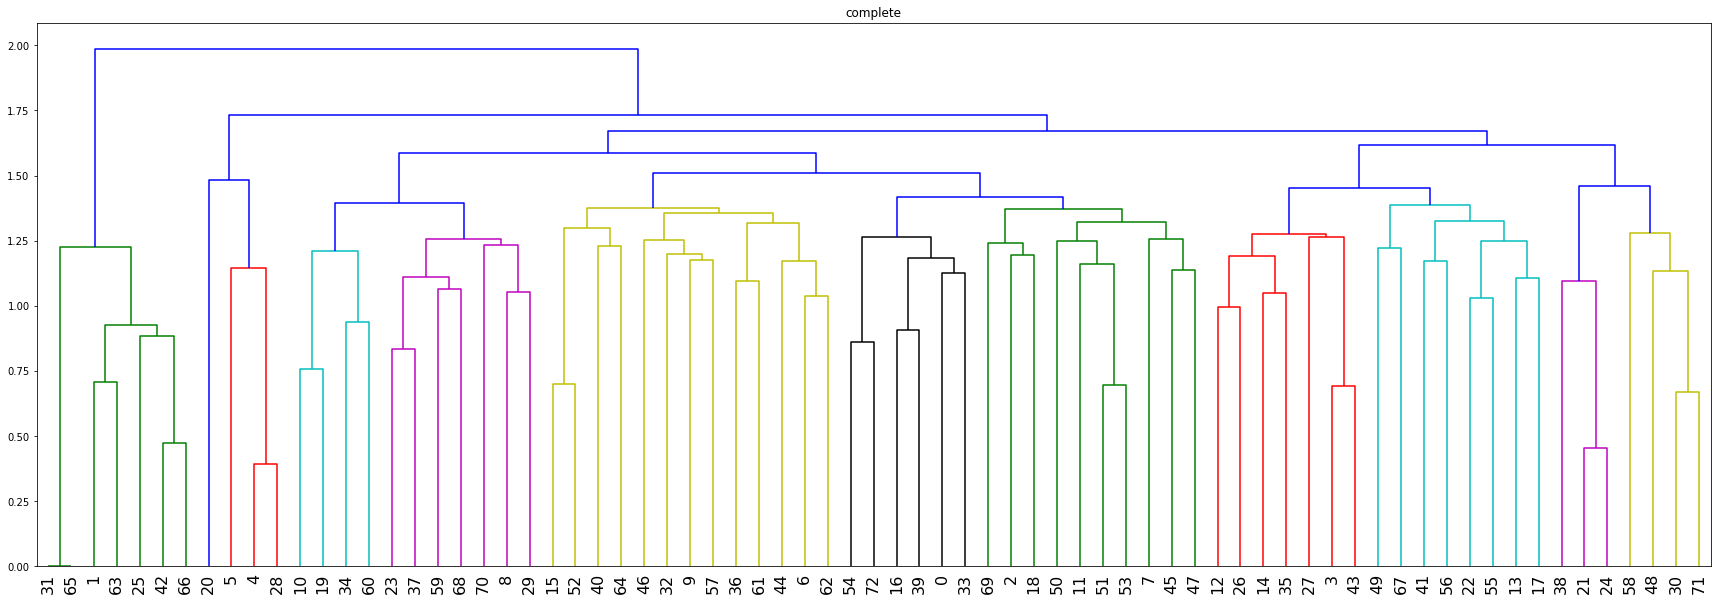

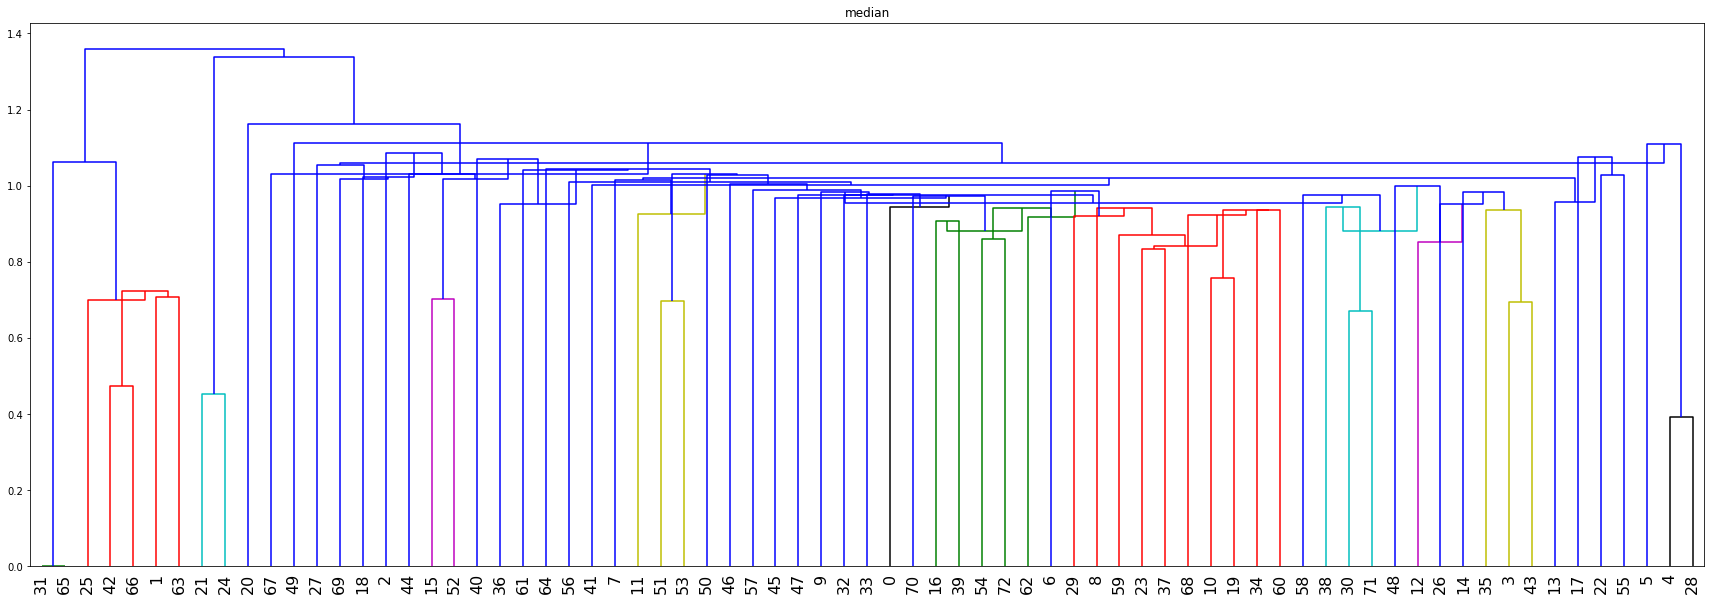

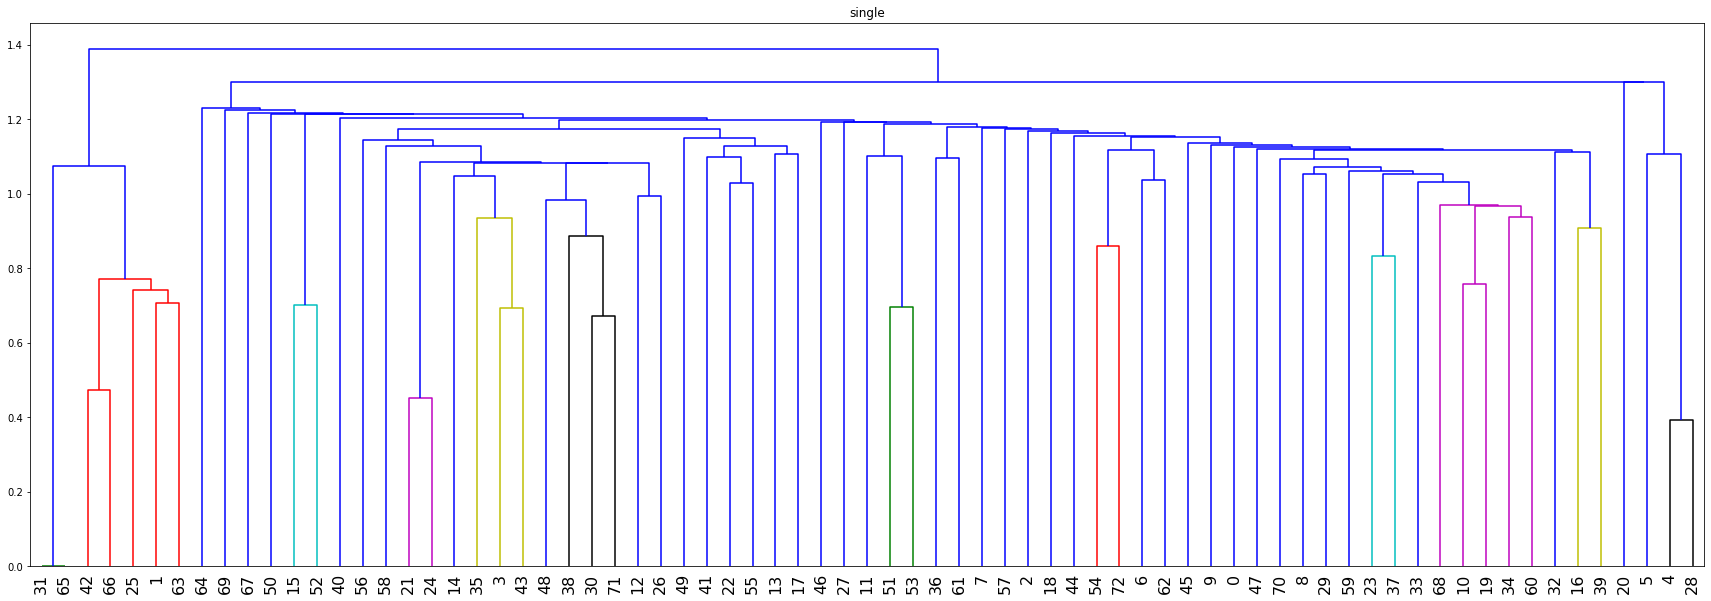

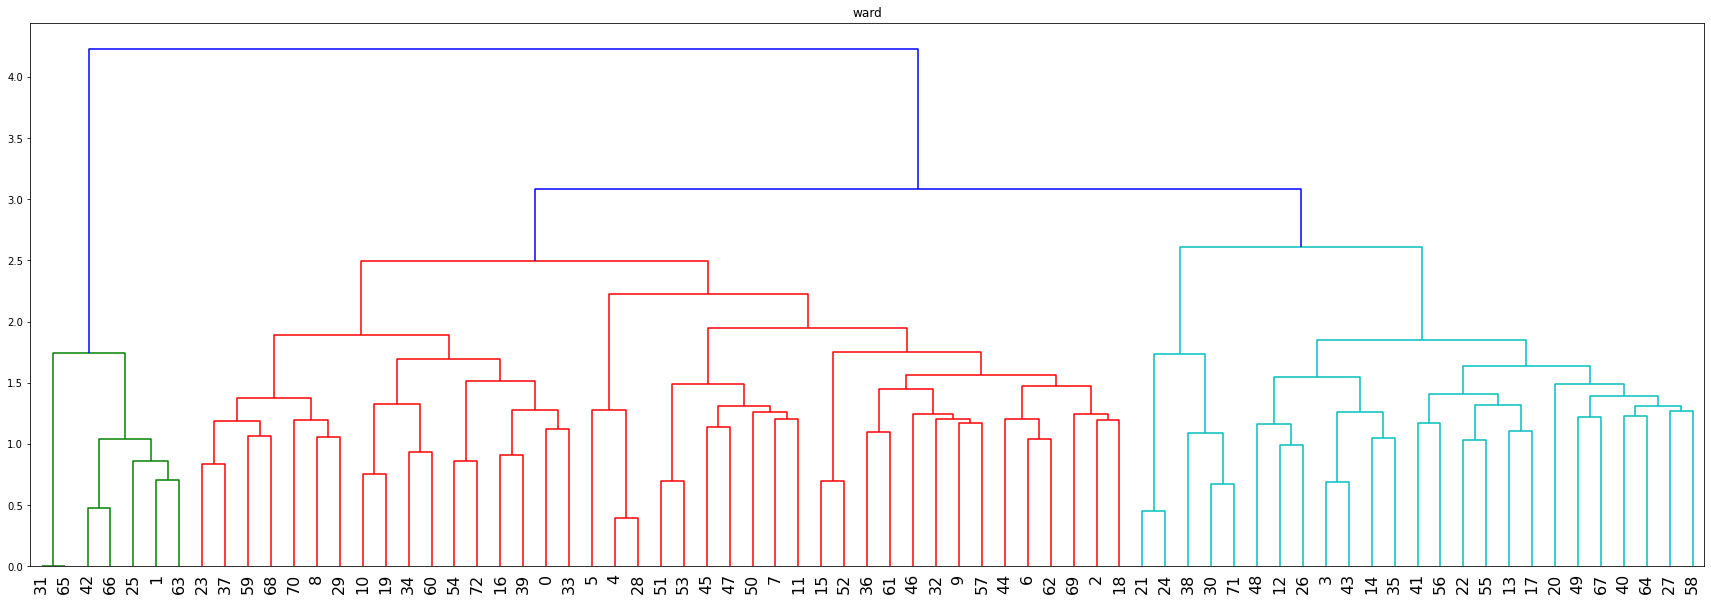

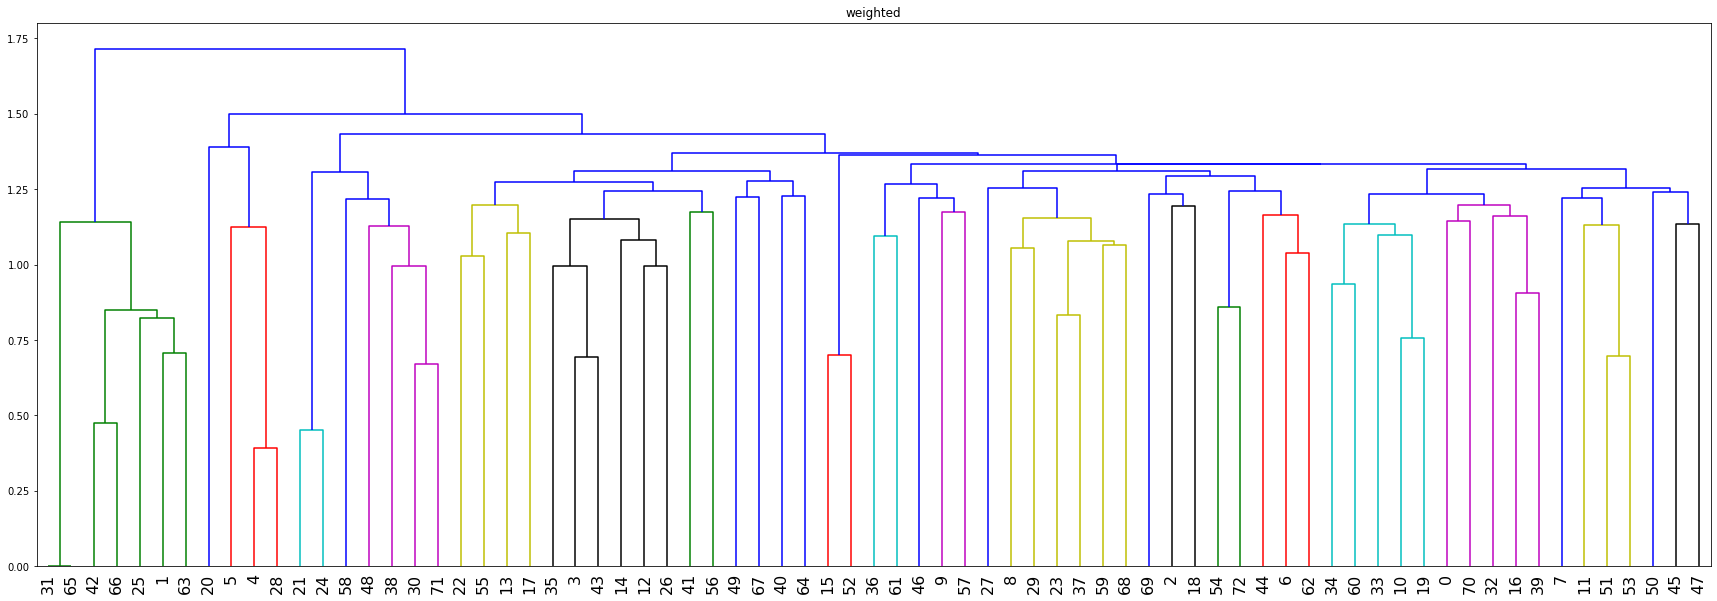

In [ ]:
#距離行列をもとに再度距離行列つくってしまっている？クラスタリング？クラスターに意味はない？
for method in method_list:
  plt.figure(figsize=(30, 10))
  Z = linkage(dis_array, method=method, metric="euclidean")
  dendrogram(Z)
  plt.title(method)
  plt.xticks(fontsize=16)
  plt.show()

In [ ]:
#sklearnでやってみた
from sklearn.cluster import AgglomerativeClustering

#距離行列を利用してクラスタリング
ward = AgglomerativeClustering(n_clusters=6)
ward.fit(dis_array)
pd.value_counts(ward.labels_)

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


0    21
2    20
1    17
4     7
3     5
5     3
dtype: int64

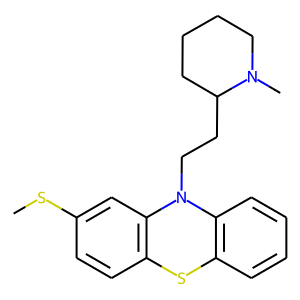

In [ ]:
ward_library = {i: [] for i in range(6)}
for n,j in enumerate(ward.labels_):
    ward_library[j].append(df.loc[n,"ROMol"])
cl3 = ward_library[3]
Draw.MolToImage(cl3[0])

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Text(0.5, 1.0, 'Dendrogram for Ward method')

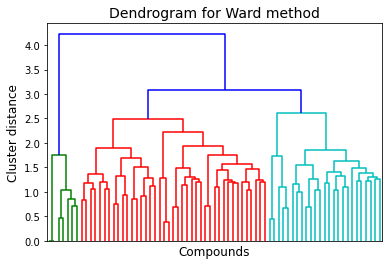

In [ ]:
from scipy.cluster import hierarchy
linked_array = hierarchy.ward(dis_array)
hierarchy.dendrogram(linked_array)
ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel('Compounds', fontsize=12)
plt.xticks([])
plt.ylabel('Cluster distance', fontsize=12)
plt.title('Dendrogram for Ward method', fontsize=14)